# DataSet #3: Mobilitat entre Municipis

Autor: Marc Bosch Manzano<br>
Data: Octubre 2025<br>
Iteració: 2a<br>
Projecte: MobiCat

Assignació: Farith, Jesús

## Anàlisi dels Municipis amb Grafs

### Importació de Llibreries

In [ ]:
PACKAGES = ["pandas", "matplotlib", "networkx", "numpy"]
COLORS = ["viridis", "plasma", "inferno", "magma", "cividis"]

import sys
sys.path.append('../mobicat_python_utils')

import utils # type: ignore
utils.install_missing_packages(PACKAGES)

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx

import IPython.display 
IPython.display.clear_output()

### Importació de les Dades

**Important**: importa al directori *test-data* els següents fitxers o canviar el directori pel directori amb els fitxers. 
```bash
    movilidad_barrios_2023-01_origen.csv
    movilidad_municipios_2023-01_origen.csv
    movilidad_mun_barrios_2023-01_origen.csv
```

Importem el dataframe de mobilitat de municipis en d'un mes. Les descripcions de les dades de mobilitat de Telefónica estan al PDF [Metadata Mobile Data Challenge DataSets 2025.pdf](./test-data/Metadata%20Mobile%20Data%20Challenge%20DataSets%202025.pdf). Li apliquem un filtre d'escollir els viatges majors a 0.

In [3]:
mobility_directory = "./test-data/"
mobility_file_name = "movilidad_municipios_2023-01_origen.csv"
mobility_file_path = os.path.join(mobility_directory, mobility_file_name)

df = pd.read_csv(mobility_file_path, dtype=str)
df["viajes"] = df["viajes"].astype(int)
df["day"] = pd.to_datetime(df["day"])
df = df[df["viajes"] > 0]

In [34]:
df_grouped = (
    df.groupby(["municipio_origen_name", "municipio_destino_name"])["viajes"]
      .sum()
      .reset_index()
)

quantile = 0.995
df_grouped = df_grouped[df_grouped["viajes"] > df_grouped["viajes"].quantile(quantile)]

display(df_grouped.sample(5))
print(df_grouped.shape)


,municipio_origen_name,municipio_destino_name,viajes
1838,Barcelona,Montcada i Reixac,502849
1824,Barcelona,Martorell,126298
1947,Barcelona,Santa Perpètua de Mogoda,188260
20010,Sitges,Vilanova i la Geltrú,197939
13191,"Prat de Llobregat, El",Cornellà de Llobregat,133980


(116, 3)


In [35]:
G = nx.DiGraph()

for _, row in df_grouped.iterrows():
    origen = row["municipio_origen_name"]
    desti = row["municipio_destino_name"]
    pes = row["viajes"]
    
    G.add_edge(origen, desti, weight=pes)

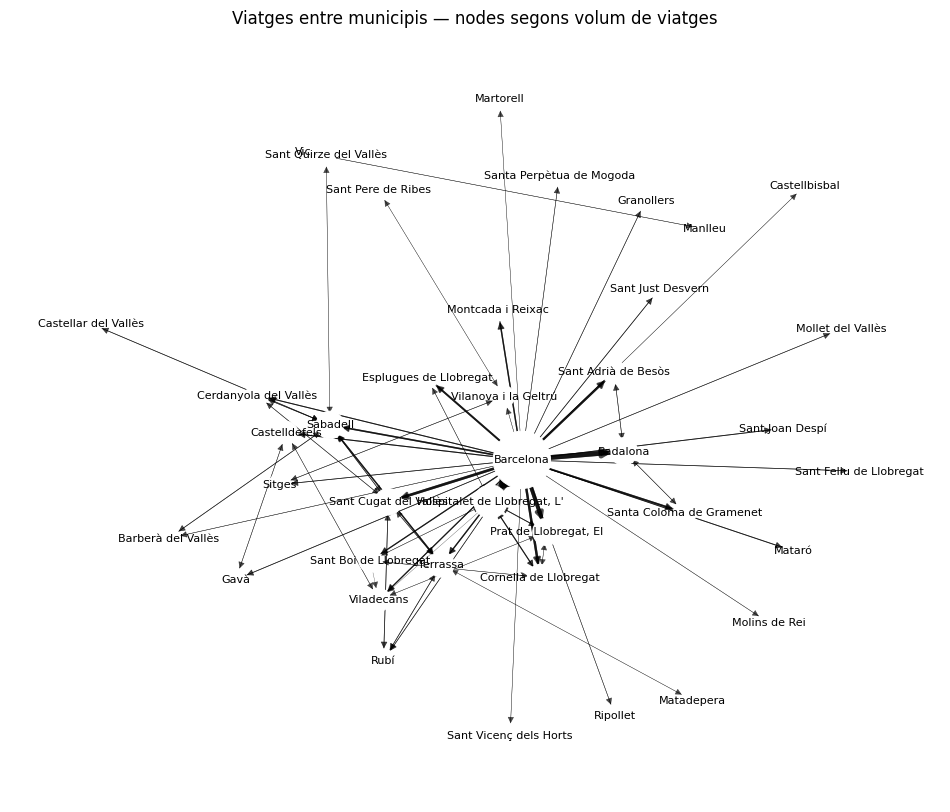

In [46]:
plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G, k=50)

pesos = nx.get_edge_attributes(G, "weight")
widths = [w / max(pesos.values()) * 6 for w in pesos.values()]

deg_weighted = dict(G.degree(weight="weight"))

values = np.array(list(deg_weighted.values()))
node_sizes = (values / values.max()) * 1500 + 200  


nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color="white",
    edgecolors="white",
    linewidths=0.8
)

nx.draw_networkx_edges(
    G, pos,
    width=widths,
    alpha=0.7
)

nx.draw_networkx_labels(
    G, pos,
    font_size=8,
    font_color="black"
)

plt.title("Viatges entre municipis — nodes segons volum de viatges")
plt.axis("off")
plt.show()
